In [4]:
import os
from pathlib import Path


from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
np.set_printoptions(suppress=True) 
np.random.seed(1234)               


#### Exercise ####


#### Please refer to module 2 of IntermediateClustering - DBSCAN for Tasks 1-8
#### Task 1
##### Import the required packages.
##### Set the numpy seed to 1234.


#### Task 2
##### Set `main_dir` to the main folder.
##### Set `data_dir` to the path of the data directory.
##### Print `main_dir` and `data_dir`.


#### Result:


In [6]:
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data/"
print(data_dir)

ex_df = pd.read_csv(data_dir+'heart_failure_clinical_records_dataset.csv')


/home/jovyan/bah-teds-july
/home/jovyan/bah-teds-july/data/


In [7]:
ex_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,id
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,4
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,5


#### Task 3
##### Load the dataset `heart_failure_clinical_records_dataset.csv` and save it as `ex_df`.
##### Print the first few rows of `ex_df`.


#### Result:


#### Task 4


##### For clustering, we will be using just the numeric columns. Drop all the other columns from `ex_df` and name the new dataset as `ex_df_subset`. 
##### The numeric columns to be used are: `r slide_params$ex_numeric_cols`.
##### Print the first few rows of `ex_df_subset` to make sure we have the correct dataset.


##### Check how many NAs are in each column and impute them with mean and check for NAs again.


##### Make sure that all the variables in `ex_df_subset` are numeric.


#### Result:


In [11]:
col = ['time', 'age', 'ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine']


ex_df_subset = ex_df[col]
ex_df_subset.head()

ex_df_subset.dtypes


time                          int64
age                         float64
ejection_fraction             int64
creatinine_phosphokinase      int64
platelets                   float64
serum_sodium                  int64
serum_creatinine            float64
dtype: object

#### Task 5
##### Scale `ex_df_subset` using the `StandardScaler` function.
##### Name the scaled dataframe as `ex_df_subset_scaled`. 
##### Convert `ex_df_subset_scaled` back to a Pandas DataFrame and make sure that the column names are the same as before.


#### Result:


In [13]:
scaler = StandardScaler()

ex_df_subset_scaled = scaler.fit_transform(ex_df_subset)

ex_df_subset_scaled = pd.DataFrame(ex_df_subset_scaled, columns = ex_df_subset.columns)
ex_df_subset_scaled.head()





,time,age,ejection_fraction,creatinine_phosphokinase,platelets,serum_sodium,serum_creatinine
0,-1.629502,1.192945,-1.530560,0.000166,1.681648e-02,-1.504036,0.490057
1,-1.603691,-0.491279,-0.007077,7.514640,7.535660e-09,-0.141976,-0.284552
2,-1.590785,0.350833,-1.530560,-0.449939,-1.038073e+00,-1.731046,-0.090900
3,-1.590785,-0.912335,-1.530560,-0.486071,-5.464741e-01,0.085034,0.490057
4,-1.577879,0.350833,-1.530560,-0.435486,6.517986e-01,-4.682176,1.264666


#### Task 6
##### Plot the variables from `ex_df_subset_scaled` to see their interactions. 


#### Result:


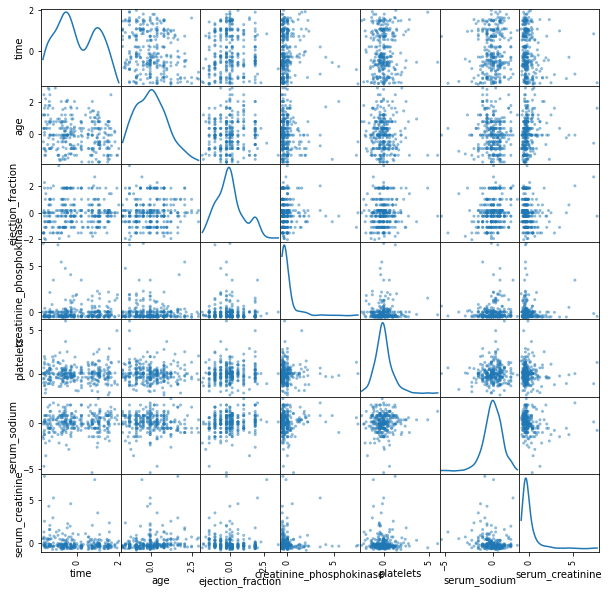

In [14]:
ex_scatter_m = scatter_matrix(ex_df_subset_scaled, 
                           alpha = 0.5, 
                           figsize = (10, 10), 
                           diagonal = 'kde')
plt.show()



#### Task 7


##### Run the DBSCAN model on `ex_df_subset_scaled`.
##### For now, we set ϵ to have a radius of 0.8.
##### We set MinPts (min_samples in the function) to 4.
##### Make a scatter plot for the clusters using 2 variables.


#### Result:


In [23]:
ex_dbscan = DBSCAN(eps=0.8, min_samples = 4)

ex_clusters = ex_dbscan.fit_predict(ex_df_subset_scaled)
ex_unique, ex_counts = np.unique(ex_clusters, return_counts=True)
print(np.asarray((ex_unique, ex_counts)).T)

[[ -1 265]
 [  0   5]
 [  1  12]
 [  2   4]
 [  3   5]
 [  4   4]
 [  5   4]]


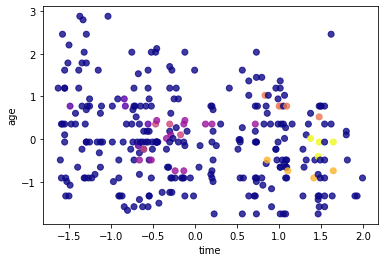

In [20]:
plt.scatter(ex_df_subset_scaled['time'], 
            ex_df_subset_scaled['age'],
            alpha = 0.8,
            c = ex_clusters, cmap = 'plasma')
plt.xlabel('time')    
plt.ylabel('age')
plt.show()



#### Task 8
##### Optimize eps and set MinPts to 4.
##### Plot the kNN distance to obtain the optimal parameters.
##### Run a new DBSCAN analysis with the optimized parameters.
##### Check the number of clusters.
##### Plot the cluster assignments using the same 2 variables you did in Task 7.


#### Result:


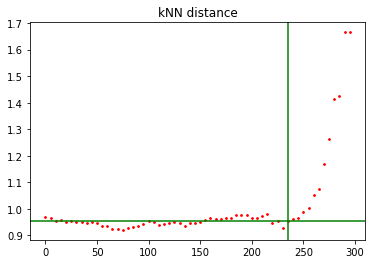

[[ -1 202]
 [  0   8]
 [  1   5]
 [  2  49]
 [  3   5]
 [  4  10]
 [  5   3]
 [  6   5]
 [  7   5]
 [  8   7]]


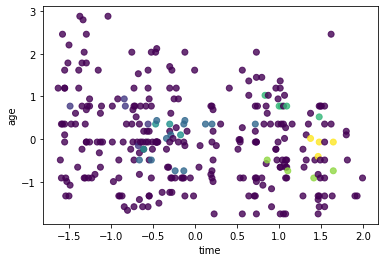

In [21]:

# Let's define the parameters needed for the functions.
n_trainingData = 0          # amount of training data evaluated using kNNdistPlot
labels = 0                  # array containing the labels of every point on the plane
n_clusters = 0              # number of clusters


def Get_distanceMean(points,minPts,previous_distanceMean):
# points: list containing the training points you want to use
# minPts: minimum number of points to be considered a cluster
# previous_distanceMean: the previous mean of the distances
# return: average distance between the points
  if (minPts < len(points)):
      nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
      distances, indices = nbrs.kneighbors(points)
      d_mean = distances.mean()
      return d_mean
  else:
      return previous_distanceMean
    
def kNNdist_plot(points,minPts):
  epsPlot = []
  current_distanceMean = previous_distanceMean = 0
  knee_value = knee_found = 0
  for i in range (0,len(points),5):
      current_distanceMean = Get_distanceMean(points[i:],minPts,previous_distanceMean)
      df = current_distanceMean - previous_distanceMean
      
      if ((df > 0.02) & (i > 1) & (knee_found == 0)):
          knee_value = current_distanceMean
          knee_found = 1
          n_trainingData = i
          
      epsPlot.append( [i,current_distanceMean] )
      previous_distanceMean = current_distanceMean
  # Plot the kNNdistPlot.
  for i in range(0, len(epsPlot)):
      plt.scatter(epsPlot[i][0],epsPlot[i][1],c='r',s=3,marker='o')
  plt.axhline(y=knee_value, color='g', linestyle='-')
  plt.axvline(x=n_trainingData , color='g', linestyle='-')
  plt.title("kNN distance")
  
  return plt, n_trainingData, knee_value


plt, ex_n_trainingData,  ex_best_eps = kNNdist_plot(ex_df_subset_scaled, 4)
plt.show()

# DBSCAN
ex_dbscan_best = DBSCAN(eps=ex_best_eps, min_samples = 4)
ex_optimized_clusters = ex_dbscan_best.fit_predict(ex_df_subset_scaled)

# Check the number of clusters
ex_unique, ex_counts = np.unique(ex_optimized_clusters, return_counts=True)
print(np.asarray((ex_unique, ex_counts)).T)

# Plot the cluster assignments.
plt.scatter(ex_df_subset_scaled['time'], 
            ex_df_subset_scaled['age'],
            alpha = 0.8,
            c = ex_clusters)
plt.xlabel('time')    
plt.ylabel('age')
plt.show()



